In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [15]:
# Lectura del dataset limpio
df_cars = pd.read_csv("./data/carlistings_limpio.csv")

# 3. Visualización

En este apartado se representarán gráficamente los datos depurados para facilitar la comprensión de patrones, tendencias y relaciones entre variables. La visualización permitirá interpretar los resultados de forma rápida y detectar posibles insights que no se aprecian fácilmente en tablas de datos. De manera que podamos responder a preguntas como:

- ¿Qué marcas son las más ofertadas?
    - ***Existen diferencias muy fuertes entre marcas económicas, medias y premium. Solo con la marca ya se puede anticipar un rango de precios bastante preciso.***
- ¿La marca es un valor influyente?
    - ***Existen diferencias muy fuertes entre marcas económicas, medias y premium. Solo con la marca ya se puede anticipar un rango de precios bastante preciso.***
- ¿Cómo influye el año del coche en su precio?
    - ***Cuanto más nuevo es el coche, mayor es su precio. La tendencia general es estable: los precios aumentan conforme se acercan los años más recientes.***
- ¿Cómo influye el kilometraje del coche en su precio?
    - ***Los coches con pocos kilómetros se venden mucho más caros, mientras que los que superan los 100.000 km bajan de precio de forma notable y se estabilizan en 150000 km, aproximadamente.***
- ¿Cómo influye el número de propietarios del coche en su precio?
    - ***Los coches con 1 solo propietario son significativamente más caros. A medida que aumenta el número de dueños, el precio baja mucho.***

## Conclusión
Con este análisis, se revelan patrones muy claros entre precio y variables como la marca, el año, los kilómetros recorridos y el número de propietarios


## 3.1 Número de coches anunciados por marca

Al revisar cuántos coches se anuncian por marca, se ve rápidamente que la oferta no está repartida de forma uniforme. La mayoría de anuncios pertenecen a Hyundai, Honda y Toyota, que acumulan el 43,92% de los anuncios. Justo detrás aparecen otras como Subaru, Volkswagen, Nissan o Mazda, que también tienen bastante movimiento. En cambio, las marcas premium (Mercedes-Benz, BMW, Audi) aparecen en menor cantidad. Por último, hay otras que apenas tienen unos pocos anuncios.
Esta diferencia de volumen ayuda a entender qué marcas tienen más peso en el mercado de segunda mano dentro del dataset y también indica que las marcas con menos presencia aportarán menos información a la hora de entrenar un modelo de predicción.



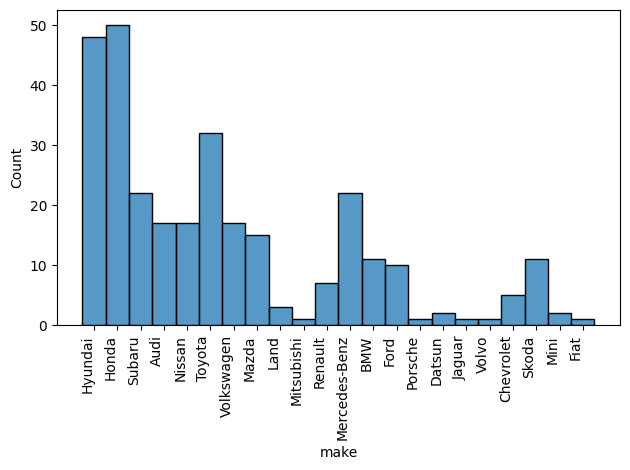

In [ ]:
sns.histplot(x=df_cars.make, fill=True)
plt.xticks(rotation=90, ha="right")
plt.tight_layout()
plt.show()

    # Visualiza un el número de coches anunciados según su marca
        # Hyundai, Honda y Toyota son las marcas más anunciadas, acumulando el 43,92% de anuncios

In [17]:
pct_top = df_cars["make"].isin(["Hyundai", "Honda", "Toyota"]).sum()

pct_top = pct_top/len(df_cars)*100
pct_top

    # Obtiene el porcentaje que acaparan las 3 marcas con más anuncios en función del total de anuncios

np.float64(43.91891891891892)

## 3.2 Distribución del Precio por Marca

Con esta gráfica se puede ver cómo se distribuyen los precios por marca. 

Aparecen 3 grupos muy claros:

1. ***Marcas más baratas:***
    Hyundai, Honda y Volkswagen.
    Suelen tener los precios más bajos. Además, sus precios son bastante parecidos entre sí, así que no hay grandes diferencias dentro de cada marca.

2. ***Marcas de precio medio:***
    Subaru, Nissan, Mazda y Toyota.
    Tienen precios algo más altos y variados. Puede que aquí se mezclan coches pequeños con otros más grandes o más potentes, por eso hay más diferencia entre unos modelos y otros.

3. ***Marcas más caras:***
    Audi, BMW y Mercedes-Benz.
    Son claramente las que tienen los precios más altos. También hay mucha diferencia entre sus coches, desde modelos más normales hasta vehículos de lujo muy caros.

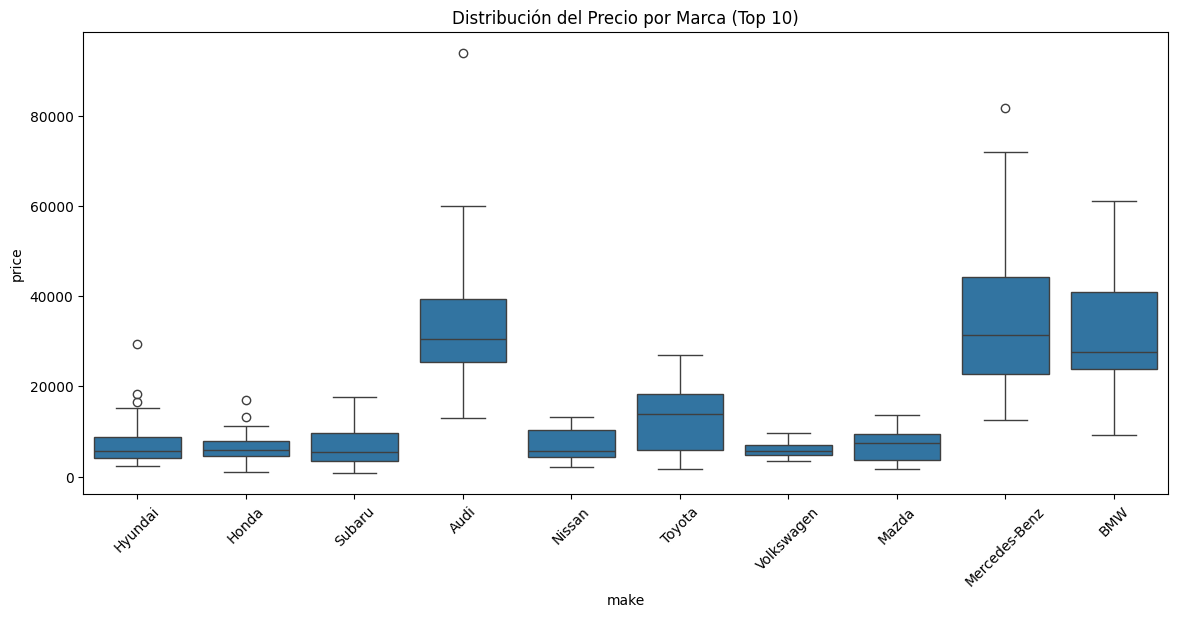

In [18]:
top_brands = df_cars["make"].value_counts().head(10).index
df_top = df_cars[df_cars["make"].isin(top_brands)]

plt.figure(figsize=(14,6))
sns.boxplot(data=df_top, x="make", y="price")
plt.xticks(rotation=45)
plt.title("Distribución del Precio por Marca (Top 10)")
plt.show()

    # Visualiza un boxplot de las 10 primeras marcas más anunciadas 
        # Se distinguen 3 segmentos de mercado: 
            # Económicos: Cajas estrechas y pocos outliers altos. Hyundai, Honda y Volswagen
            # Segmento medio: Mayor amplitud en sus cajas (oferta variada dentro de la misma marca). Subaru, Mazda, Nissan y Toyota
            # Premium: Gran dispersión y outliers extremadamente altos. Audi, BMW y Mercedes-Benz

## 3.3 Precio vs año (con tendencia)

La tendencia general confirma que los coches más nuevos son claramente más caros. Observando que:

- Los coches más antiguos (2002–2008) aparecen muy abajo porque tienen precios muy bajos y poco margen.
- A partir de 2010 empiezan a verse coches más caros y más variados.
- Desde 2013 la dispersión aumenta mucho: hay tanto coches económicos como coches de más de 40.000€.
- Los coches más nuevos (2017–2019) concentran los precios más altos y también los modelos de lujo, lo que explica la aparición de puntos muy altos en esos años.

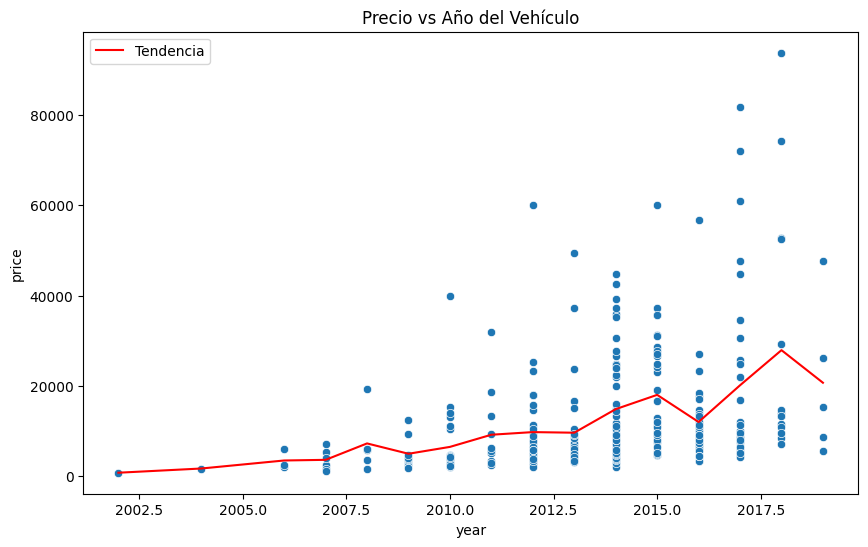

In [19]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=df_cars, x="year", y="price")
sns.lineplot(data=df_cars.groupby("year")["price"].mean(), label="Tendencia", color="red")
plt.title("Precio vs Año del Vehículo")
plt.show()

    # Enseña el precio del coche en función del año, con tendencia
        # Cuánto más nuevos son los coches, más cuestan y mayor número de anuncios.
            # 2002 - 2009: Coches viejos y baratos
            # 2010 - 2017: Coches de todo tipo. Se empiezan a mezclar modelos y precios pero con tendencia ascendente
            # 2018-2019: Coches más nuevos y más caros. La mayor concentración entre 15000 - 30000 $, pero picos de casi 100000 $ referentes a la gama premium.

## 3.4 Precio vs Kilómetros

La gráfica muestra que el kilometraje tiene una relación clara con el precio: los coches con pocos kilómetros pueden alcanzar precios muy altos, mientras que a medida que aumenta el kilometraje el precio cae de forma evidente. La mayoría de vehículos se concentran en un rango de 20.000 a 80.000 km, y por encima de los 100.000 km el precio tiende a situarse en valores bajos.

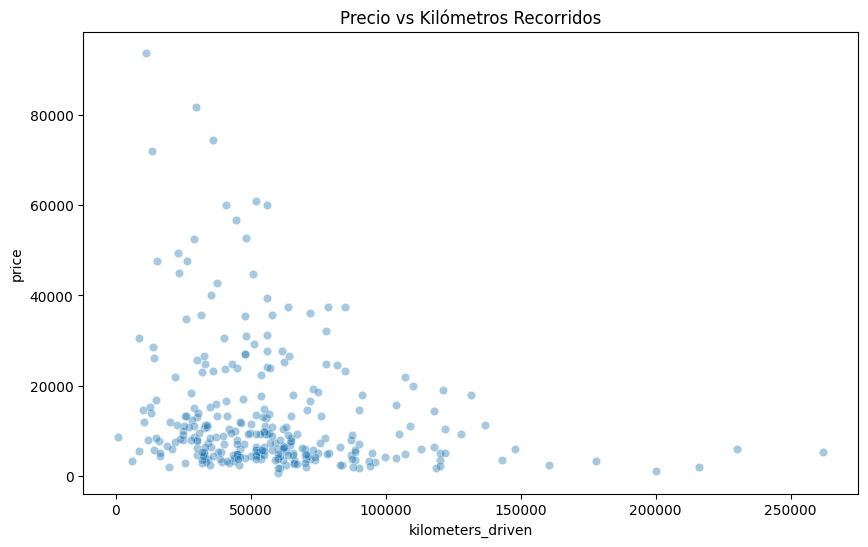

In [20]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=df_cars, x="kilometers_driven", y="price", alpha=0.4)
plt.title("Precio vs Kilómetros Recorridos")
plt.show()

    # Muestra el precio de cada coche en función de los kilómetors
        # La mayoría suelen estar entre 20000 - 80000 km
        # Los coches más caros suelen tener menos kms
        # A partir de 100000 km, los precios bajan mucho
        # A partir de 140000 km, el precio no varía demasiado.

## 3.5 Precio vs Número de Propietarios

Los coches con un solo propietario son los más caros y los que tienen mayor variación de precios porque incluyen tanto modelos normales como coches premium. A medida que aumenta el número de dueños, el precio baja de forma clara. Los coches de tercer propietario o más y son los más baratos, lo que confirma que el historial de propietarios es un factor muy importante en el valor de un vehículo usado.

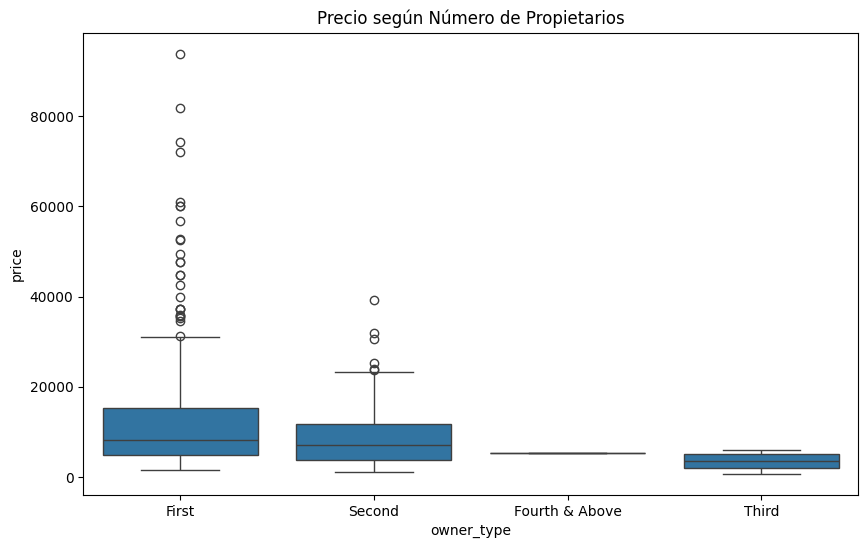

In [21]:
plt.figure(figsize=(10,6))
sns.boxplot(data=df_cars, x="owner_type", y="price")
plt.title("Precio según Número de Propietarios")
plt.show()

    # Muestra el precio de cada coche en función del número de propietarios
        # Los coches con un solo propietario son claramente los más caros
        # Los coches de segundo propietario supone una bajada notable de precio
        # Los coches con 3 o más propietarios pierden mucho valor

## 3.6 Distribución del combustible

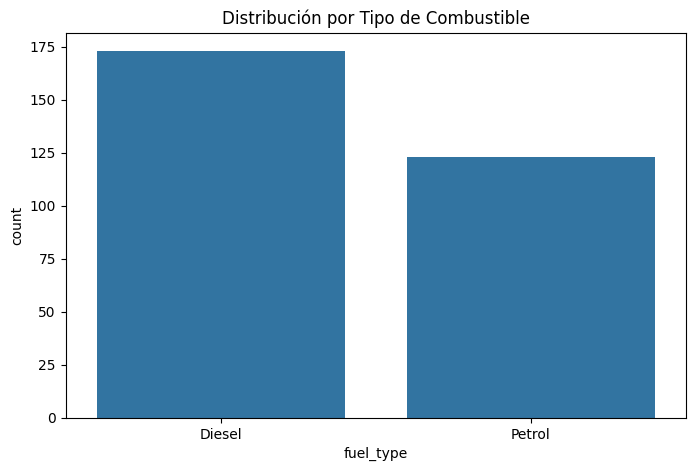

In [22]:
plt.figure(figsize=(8,5))
sns.countplot(data=df_cars, x='fuel_type', order=df_cars['fuel_type'].value_counts().index)
plt.title('Distribución por Tipo de Combustible')
plt.xticks(rotation=0)
plt.show()

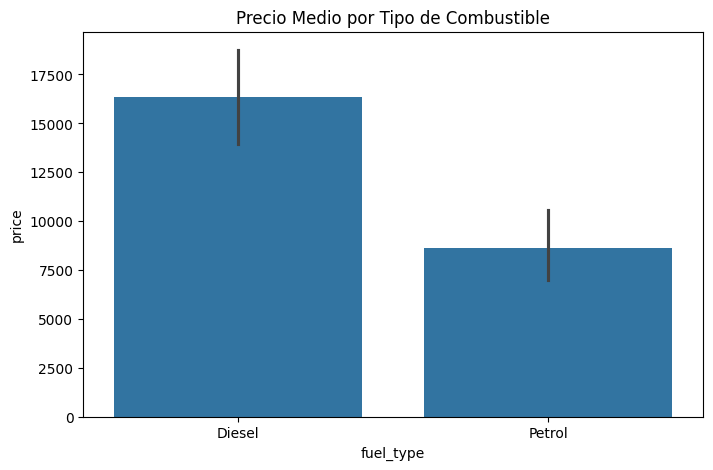

In [23]:
plt.figure(figsize=(8,5))
sns.barplot(data=df_cars, x='fuel_type', y='price')
plt.title('Precio Medio por Tipo de Combustible')
plt.xticks(rotation=0)
plt.show()